## Script for Equity analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # Import statsmodels
from scipy.stats import pearsonr  # Import Pearson correlation function

In [ ]:
data1 = pd.read_csv('siteA_output.csv')
data2 = pd.read_csv('siteB_output.csv')
data3 = pd.read_csv('siteC_output.csv')
data4 = pd.read_csv('siteD_output.csv')

### [1] Site A

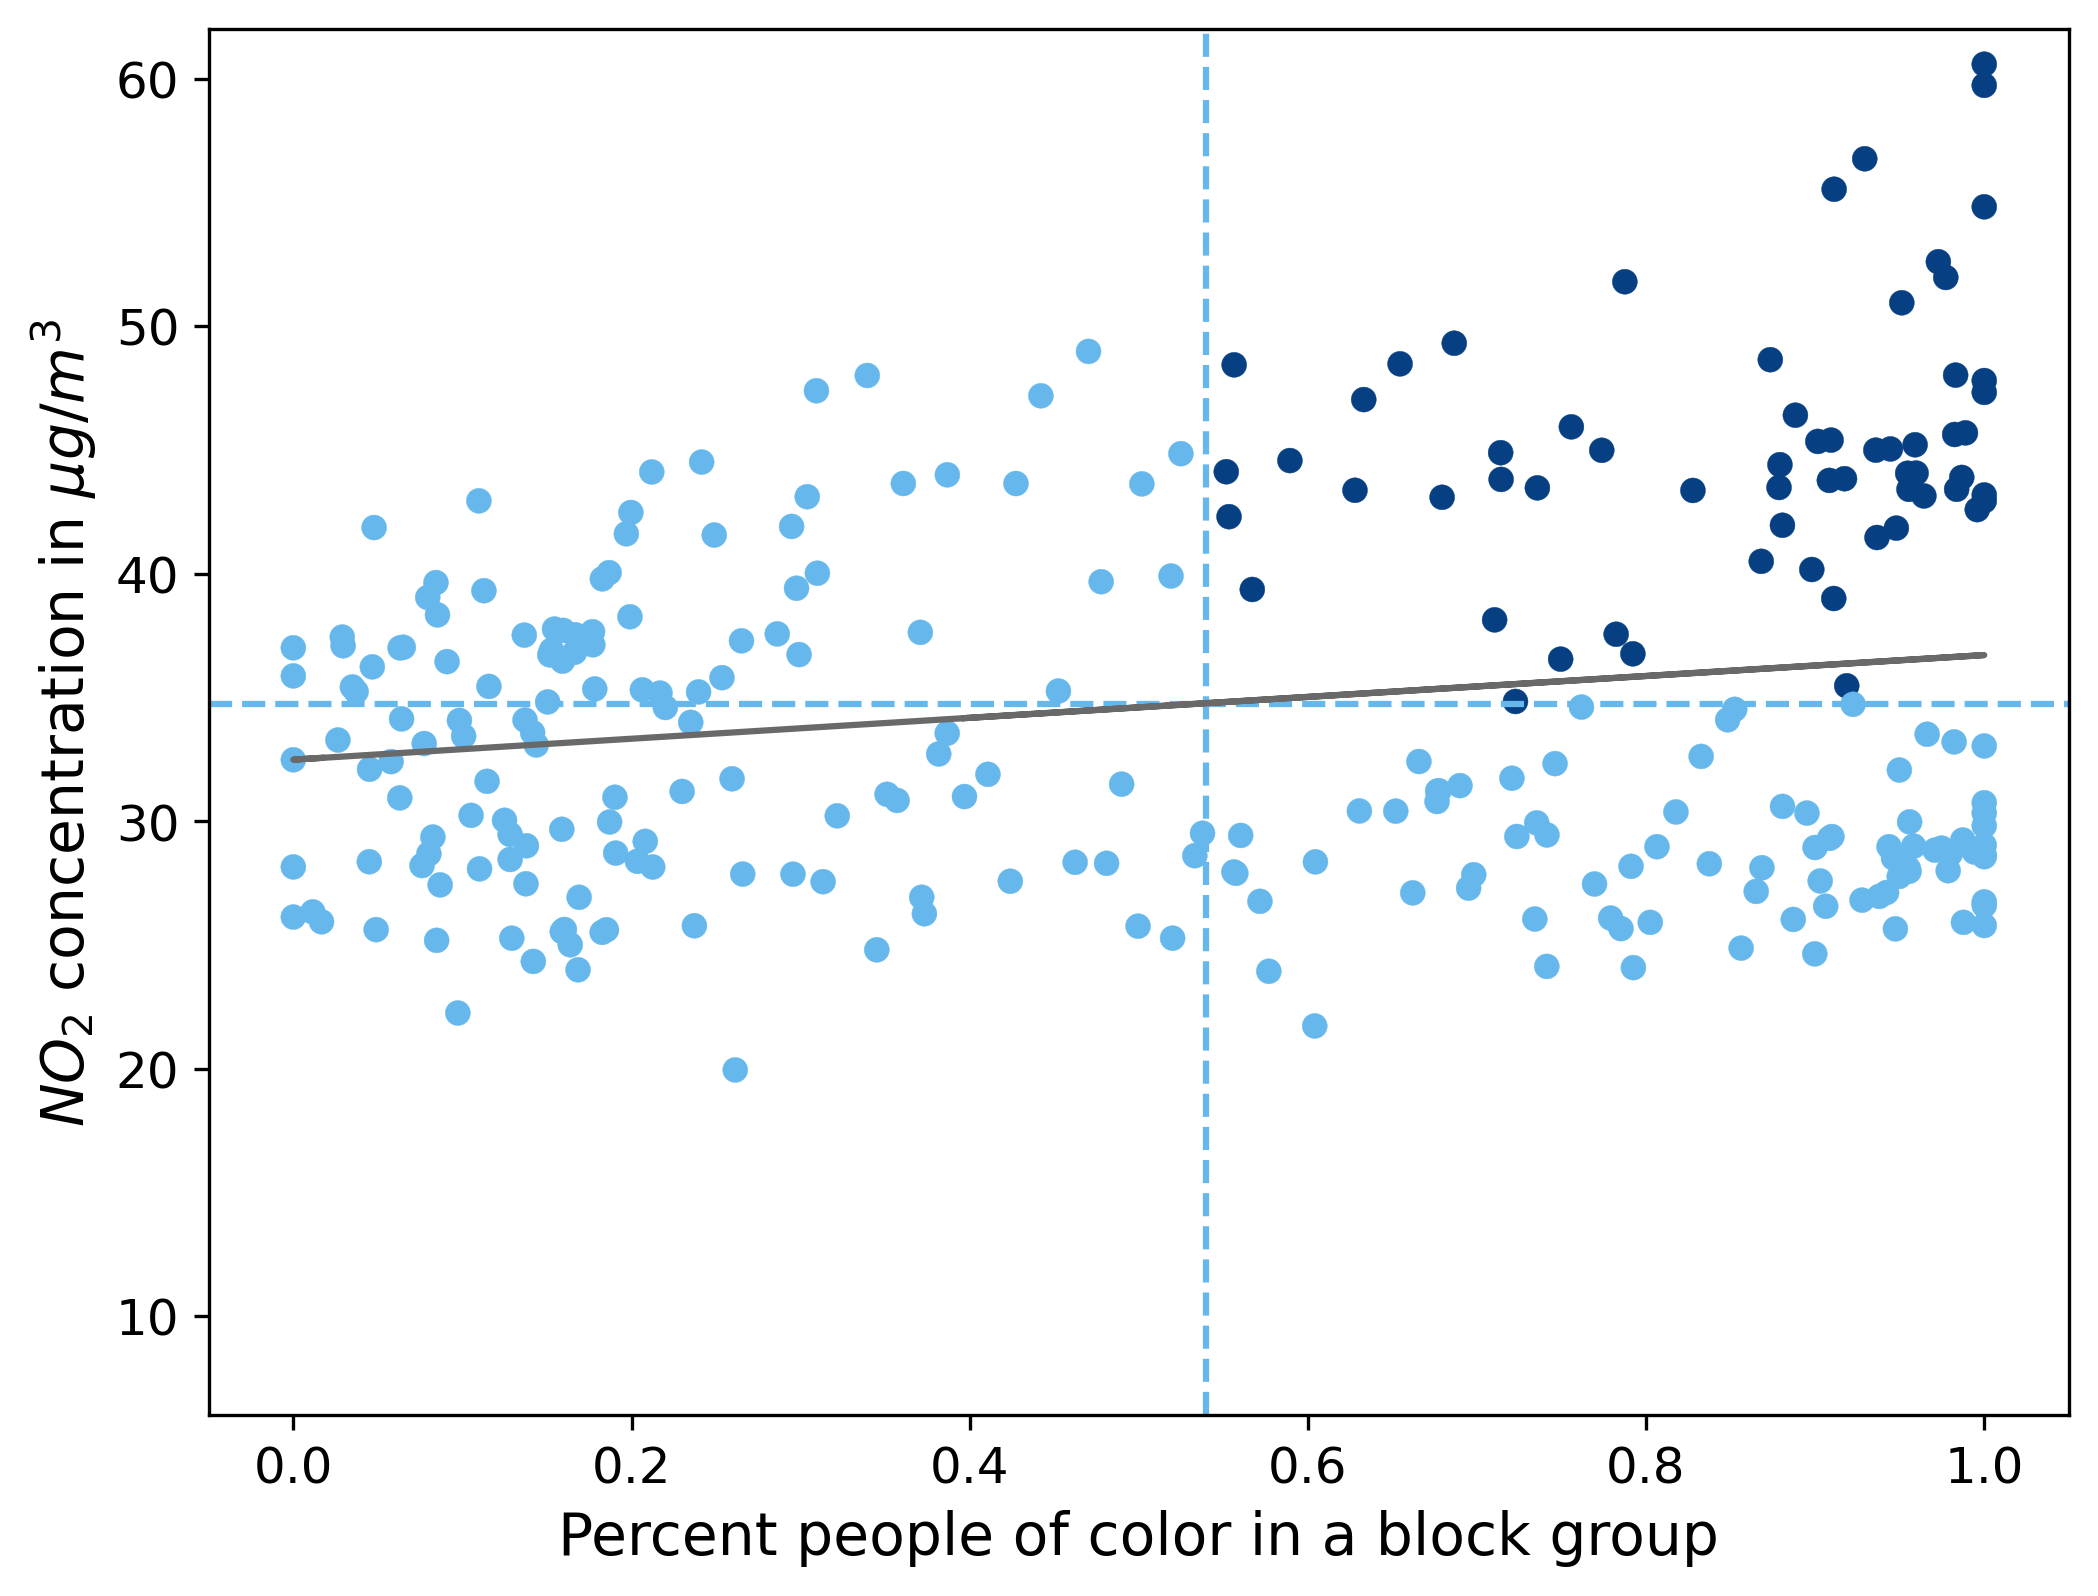

Pearson correlation coefficient: 0.187
Trend line equation: y = 4.23x + 32.49
R-squared: 0.035135378732854994
P-value for POC_Percent: 0.0016619953847406266
                            OLS Regression Results                            
Dep. Variable:            NO2_AVECONC   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     10.09
Date:                Wed, 19 Feb 2025   Prob (F-statistic):            0.00166
Time:                        22:17:27   Log-Likelihood:                -965.46
No. Observations:                 279   AIC:                             1935.
Df Residuals:                     277   BIC:                             1942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t

In [28]:
# Define threshold values for high people of color percentage and high NO2 concentration
high_poc_threshold1 = 0.54  # adjust as needed
high_no2_threshold1 = 34.75  # adjust as needed

# Create a new column for color based on conditions
colors = ['#074082' if (x > high_poc_threshold1 and y > high_no2_threshold1) else '#66b8ec'   # #074082 #66b8ec  plt.ylim(6, 62)
          for x, y in zip(data1['PEOPCOLORP'], data1['NO2_AVECONC'])]

# Plot the scatter plot with customized colors
plt.figure(figsize=(8, 6),dpi=300)
plt.scatter(data1['PEOPCOLORP'], data1['NO2_AVECONC'], color=colors, linewidths=0.1)

# Add the horizontal and vertical line at x,y = thresholds
plt.axhline(y=high_no2_threshold1, color='#66b8ec', linestyle='--')   ##  #5ba4d3
plt.axvline(x=high_poc_threshold1, color='#66b8ec', linestyle='--')

# Perform linear regression (using statsmodels)
x = data1['PEOPCOLORP']
y = data1['NO2_AVECONC']

# Add a constant term for the intercept in the regression model
x_with_const = sm.add_constant(x)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, x_with_const).fit()

# Extract the slope (coefficient) and intercept
intercept, slope = model.params

# Generate the trend line values
y_trend = slope * x + intercept

# Plot the trend line
plt.plot(x, y_trend, color='dimgrey', linestyle='-', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')

# Add labels and customize the plot
plt.xlabel('Percent people of color in a block group', fontsize=14)
plt.ylabel(r'$NO_2$ concentration in $\mu g/m^3$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set y-axis limits
plt.ylim(6, 62)

## Save as PNG with high resolution
plt.savefig('poc_A.jpg') 

# Show the plot
plt.show()

# Calculate and print Pearson correlation coefficient
pearson_corr, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: {pearson_corr:.3f}")

# Print the regression output
print(f'Trend line equation: y = {slope:.2f}x + {intercept:.2f}')
print("R-squared:", model.rsquared)
print("P-value for POC_Percent:", model.pvalues['PEOPCOLORP'])
print(model.summary())  # Detailed regression output

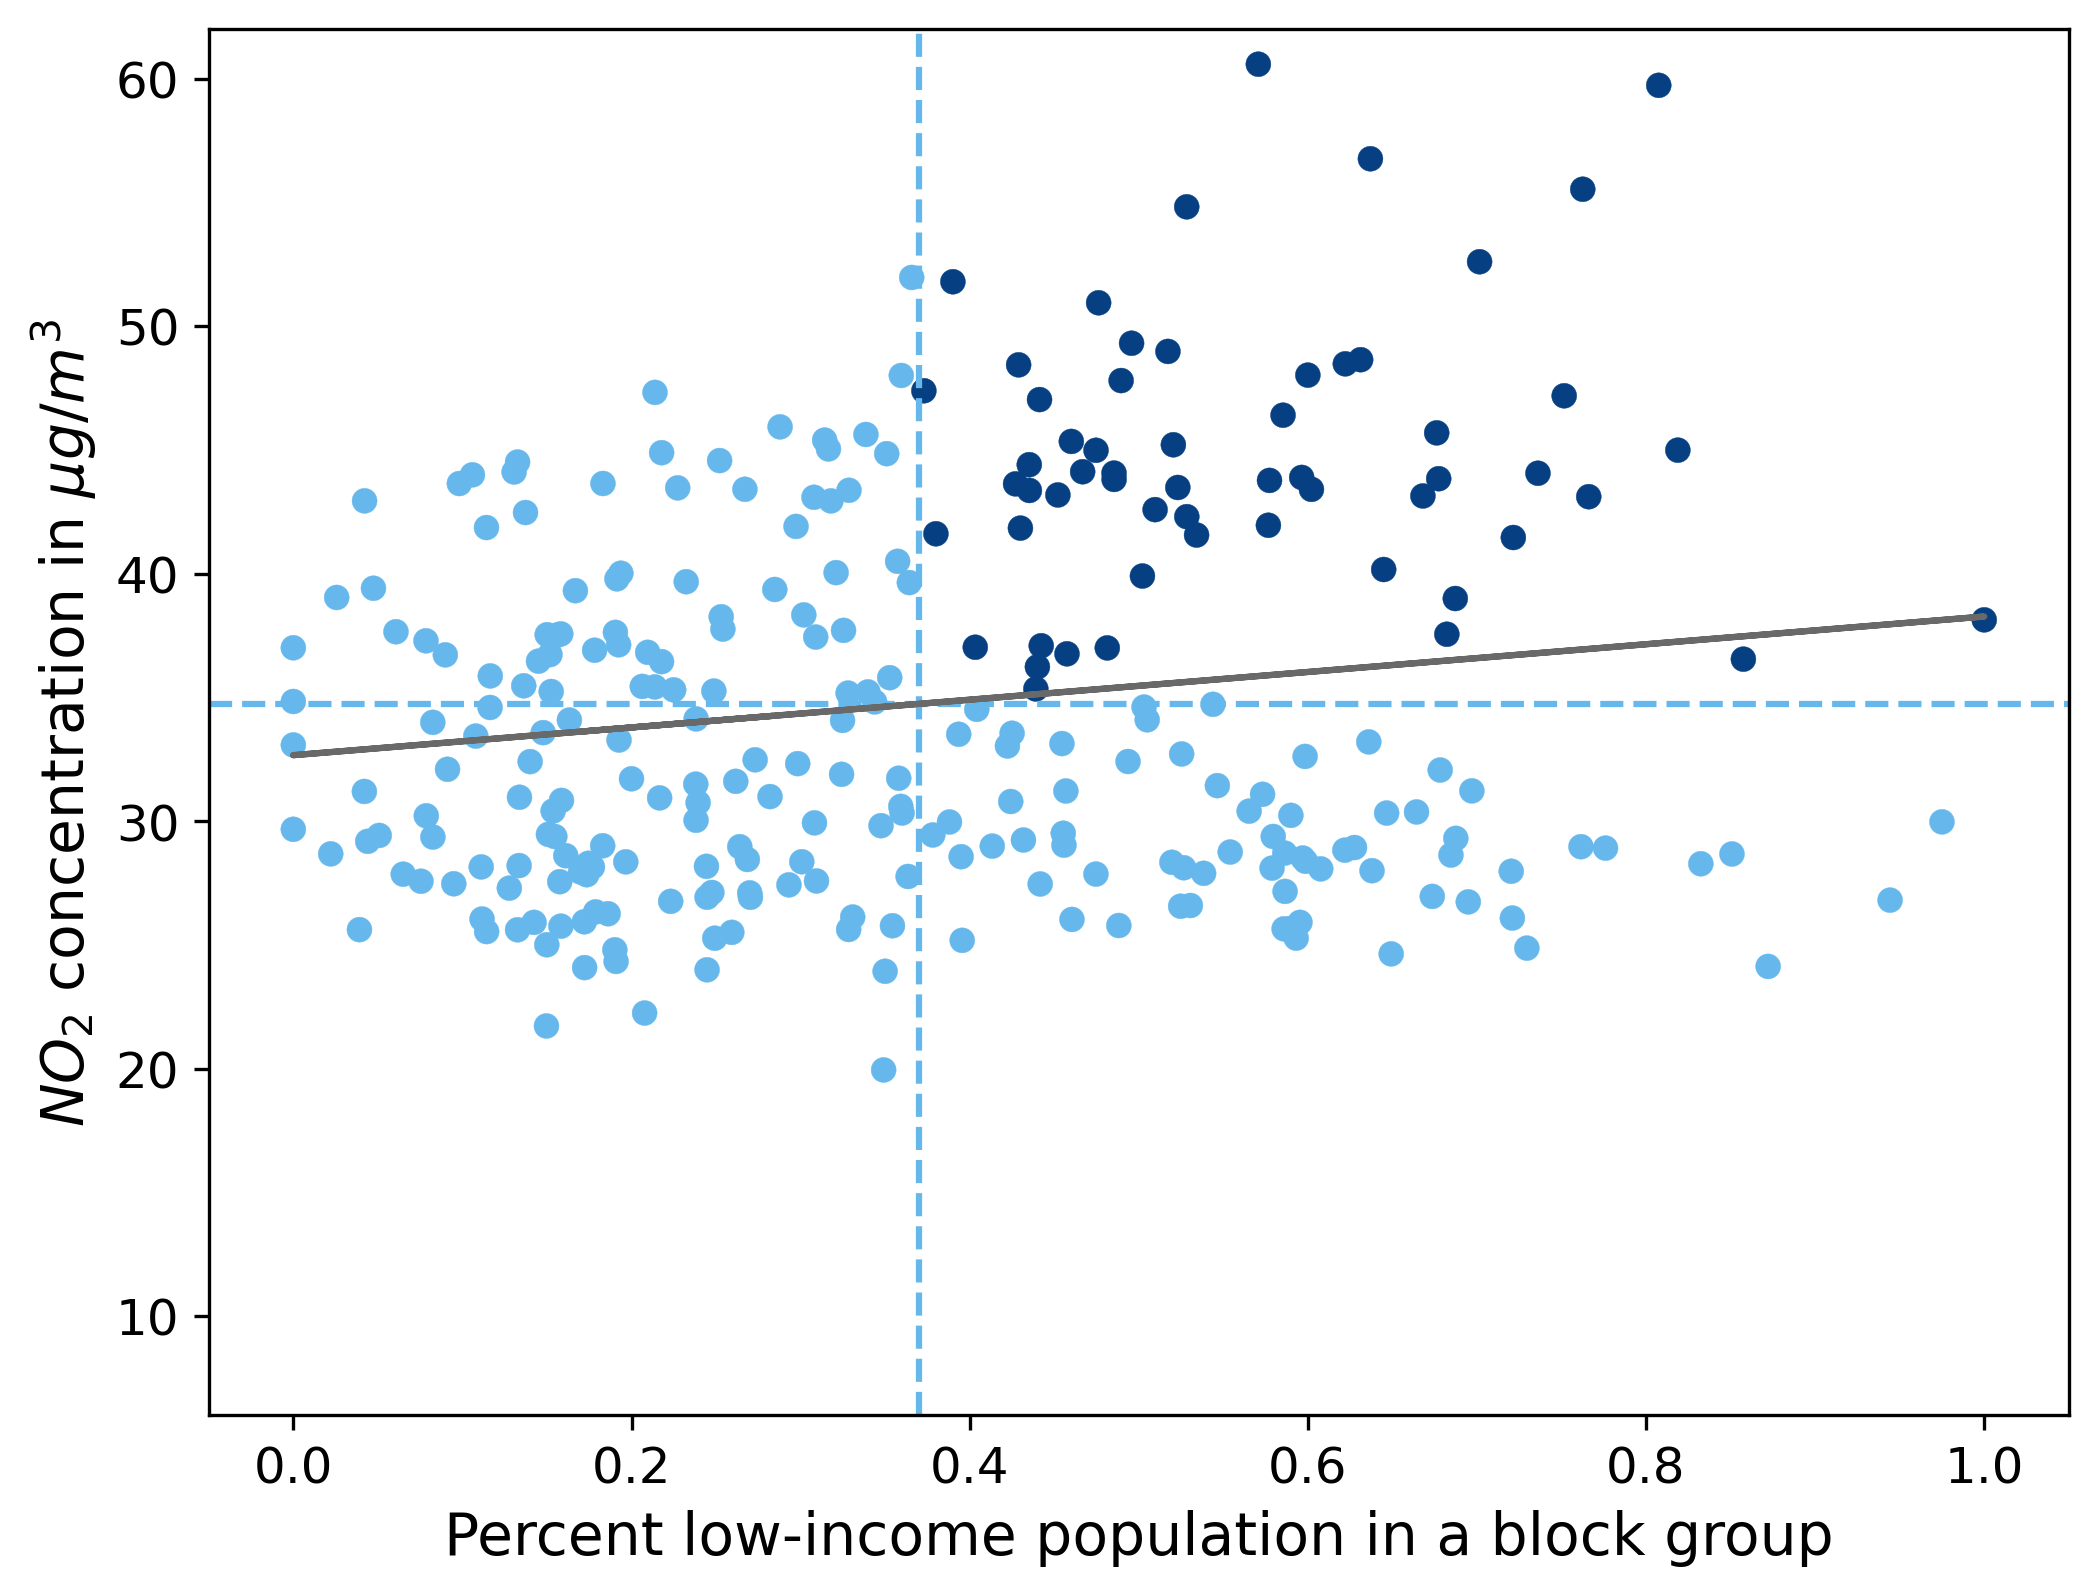

Pearson correlation coefficient: 0.155
Trend line equation: y = 5.60x + 32.67
R-squared: 0.024131803173682465
P-value for low-income_Percent: 0.009352162745025353
                            OLS Regression Results                            
Dep. Variable:            NO2_AVECONC   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.850
Date:                Wed, 19 Feb 2025   Prob (F-statistic):            0.00935
Time:                        21:52:28   Log-Likelihood:                -967.04
No. Observations:                 279   AIC:                             1938.
Df Residuals:                     277   BIC:                             1945.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t    

In [16]:
# Define threshold values for high people of color percentage and high NO2 concentration
high_low_threshold1 = 0.37 # adjust as needed
high_no2_threshold1 = 34.75  # adjust as needed

# Create a new column for color based on conditions
colors = ['#074082' if (x > high_low_threshold1 and y > high_no2_threshold1) else '#66b8ec' 
          for x, y in zip(data1['LOWINCPCT'], data1['NO2_AVECONC'])]                #074082 #66b8ec  plt.ylim(6, 62)

# Plot the scatter plot with customized colors
plt.figure(figsize=(8,6),dpi=300)
plt.scatter(data1['LOWINCPCT'], data1['NO2_AVECONC'], color=colors, linewidths=0.1)

# Add the horizontal line at y = 17.91
plt.axhline(y=high_no2_threshold1, color='#66b8ec', linestyle='--')
plt.axvline(x=high_low_threshold1, color='#66b8ec', linestyle='--')

# Perform linear regression (using statsmodels)
x1 = data1['LOWINCPCT']
y = data1['NO2_AVECONC']


# Add a constant term for the intercept in the regression model
x1_with_const = sm.add_constant(x1)

# Fit the OLS (Ordinary Least Squares) model
model1 = sm.OLS(y, x1_with_const).fit()

# Extract the slope (coefficient) and intercept
intercept1, slope1 = model1.params

# Generate the trend line values
y_trend1 = slope1 * x1 + intercept1

# Plot the trend line
plt.plot(x1, y_trend1, color='dimgrey', linestyle='-', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')


# Add labels and customize the plot
plt.xlabel('Percent low-income population in a block group', fontsize=14)
plt.ylabel(r'$NO_2$ concentration in $\mu g/m^3$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(6, 62)

plt.savefig('lowin_A.jpg')

# Show the plot
plt.show()

# Calculate and print Pearson correlation coefficient
pearson_corr1, p_value1 = pearsonr(x1, y)
print(f"Pearson correlation coefficient: {pearson_corr1:.3f}")

# Print the regression output
print(f'Trend line equation: y = {slope1:.2f}x + {intercept1:.2f}')
print("R-squared:", model1.rsquared)
print("P-value for low-income_Percent:", model1.pvalues['LOWINCPCT'])
print(model1.summary())  # Detailed regression output

### [2] Site B

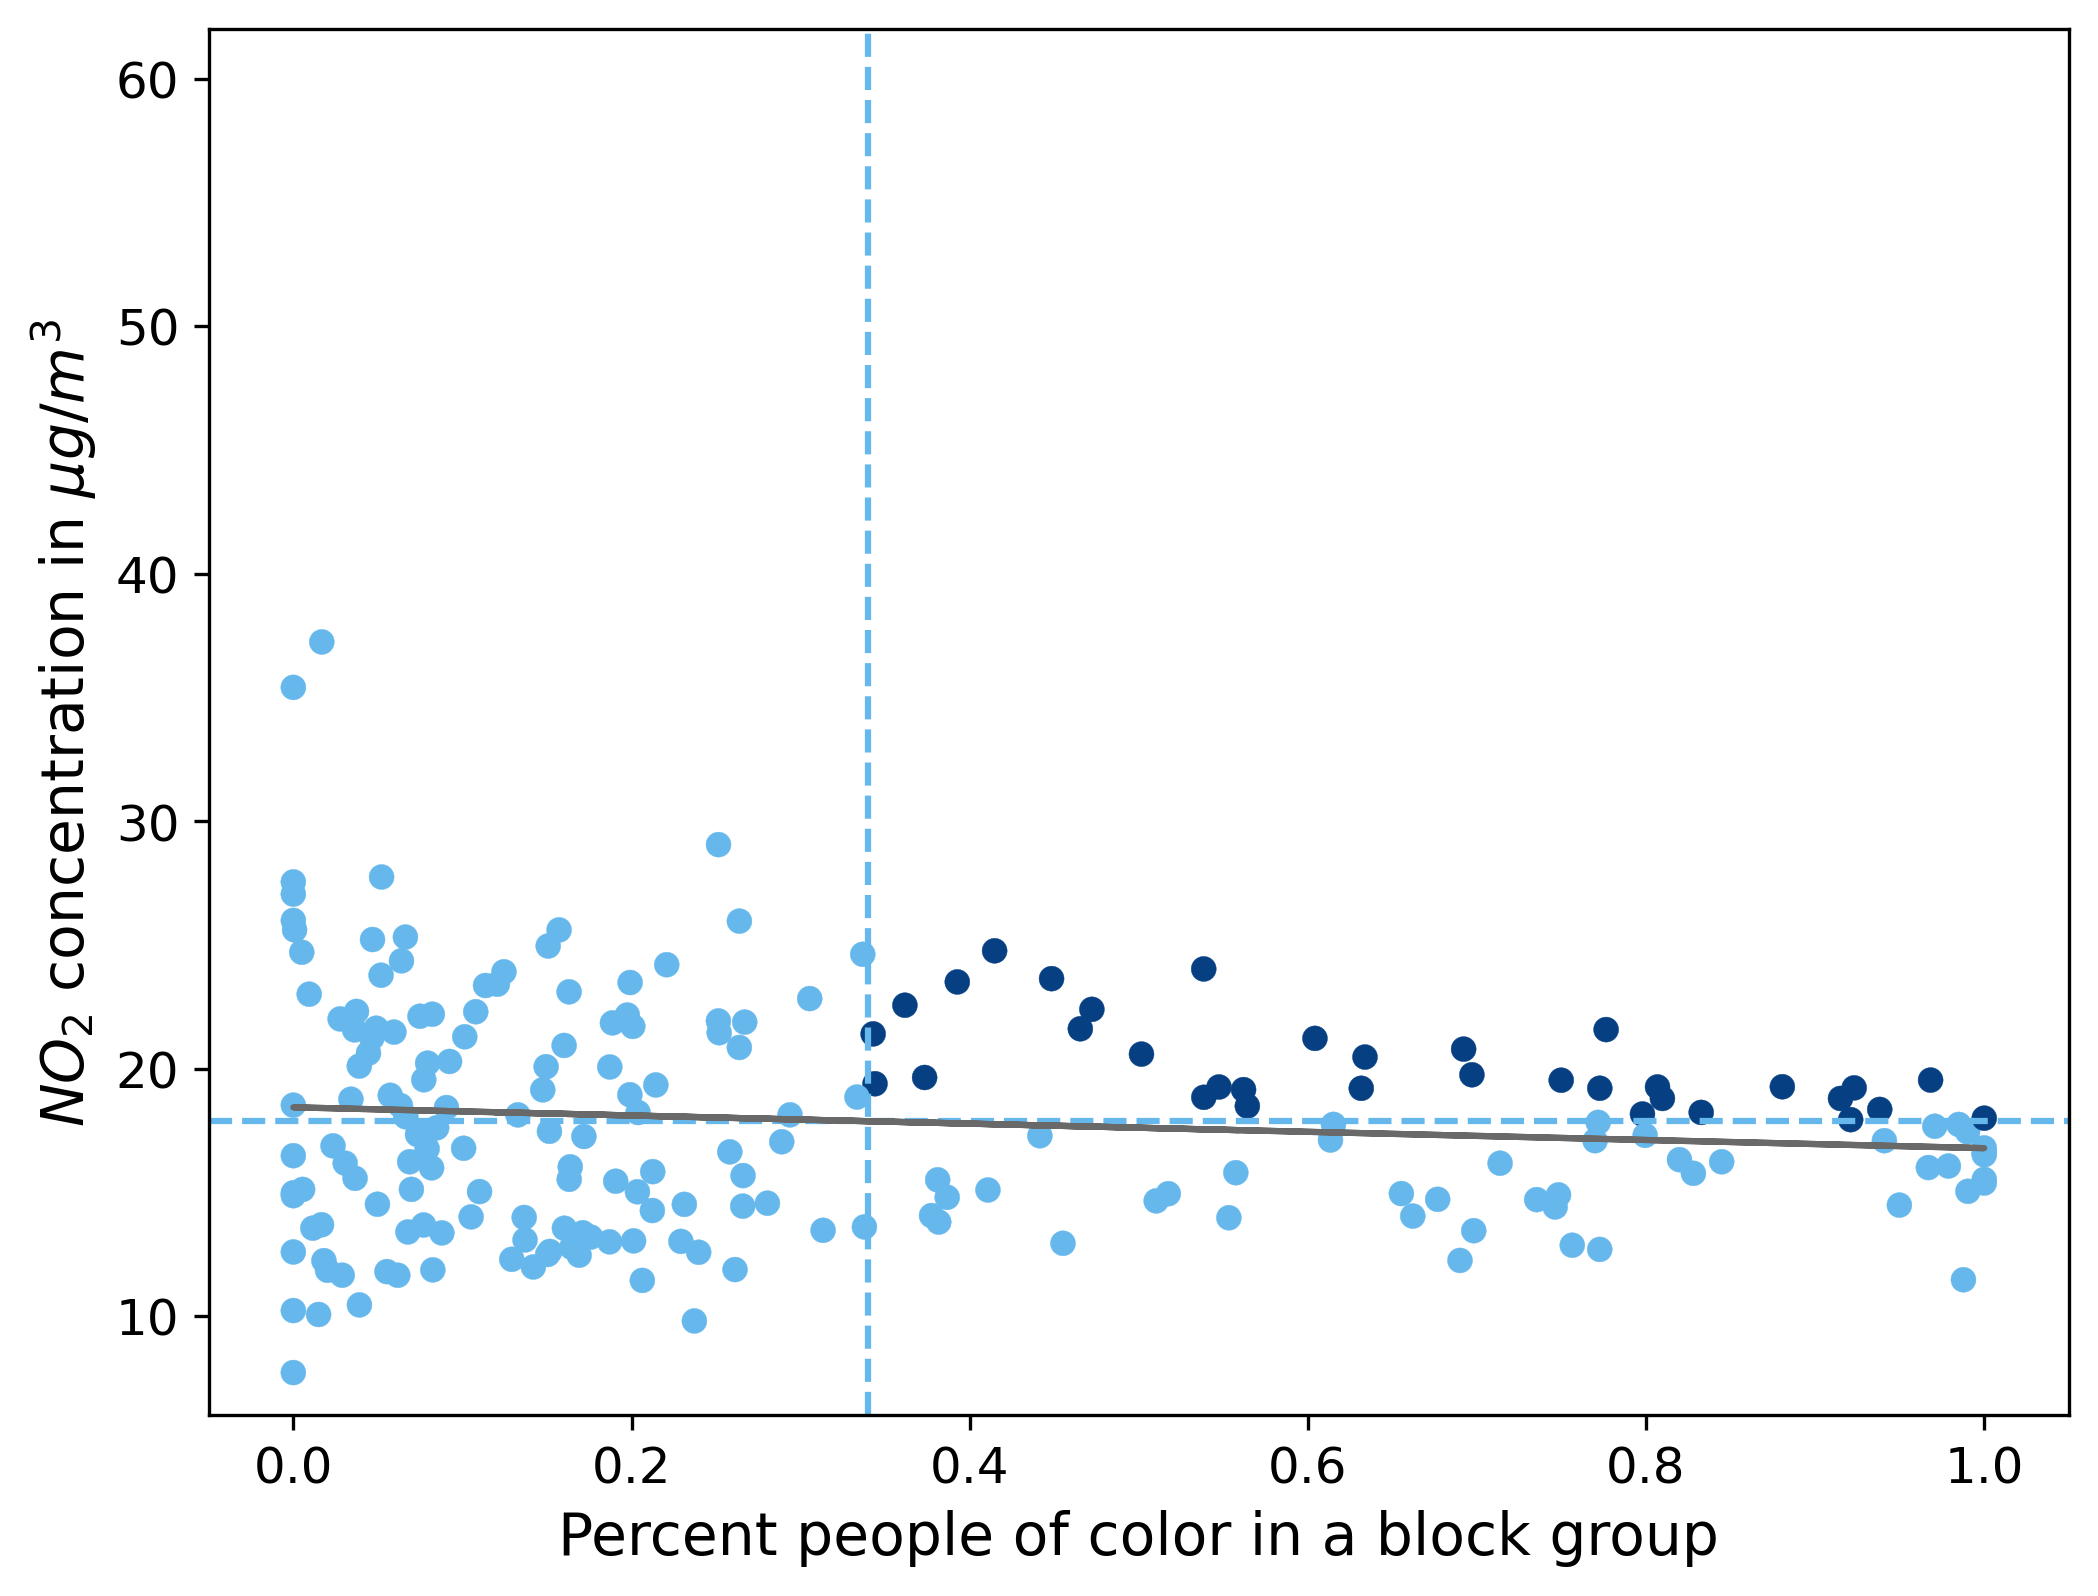

Pearson correlation coefficient: -0.116
Trend line equation: y = -1.65x + 18.44
R-squared: 0.013409348639842333
P-value for POC_Percent: 0.09578976215771776
                            OLS Regression Results                            
Dep. Variable:             NO2_AVECON   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.800
Date:                Wed, 19 Feb 2025   Prob (F-statistic):             0.0958
Time:                        22:16:36   Log-Likelihood:                -607.39
No. Observations:                 208   AIC:                             1219.
Df Residuals:                     206   BIC:                             1225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t

In [27]:
# Define threshold values for high people of color percentage and high NO2 concentration
high_poc_threshold = 0.34  # adjust as needed
high_no2_threshold = 17.88  # adjust as needed

# Create a new column for color based on conditions
colors = ['#074082' if (x > high_poc_threshold and y > high_no2_threshold) else '#66b8ec'    #074082 #66b8ec  plt.ylim(6, 62)
          for x, y in zip(data2['PEOPCOLORP'], data2['NO2_AVECON'])]

# Plot the scatter plot with customized colors
plt.figure(figsize=(8,6),dpi=300)
plt.scatter(data2['PEOPCOLORP'], data2['NO2_AVECON'], color=colors, linewidths=0.1)

# Add the horizontal line at y = 17.91
plt.axhline(y=high_no2_threshold, color='#66b8ec', linestyle='--')
plt.axvline(x=high_poc_threshold, color='#66b8ec', linestyle='--')


# Perform linear regression (least squares)
x2a = data2['PEOPCOLORP']
y2 = data2['NO2_AVECON']

# Add a constant term for the intercept in the regression model
x2a_with_const = sm.add_constant(x2a)

# Fit the OLS (Ordinary Least Squares) model
model2a = sm.OLS(y2, x2a_with_const).fit()

# Extract the slope (coefficient) and intercept
intercept2a, slope2a = model2a.params

# Generate the trend line values
y2a_trend = slope2a * x2a + intercept2a

# Plot the trend line
plt.plot(x2a, y2a_trend, color='dimgrey', linestyle='-', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')

# Add labels and customize the plot
plt.xlabel('Percent people of color in a block group', fontsize=14)
plt.ylabel(r'$NO_2$ concentration in $\mu g/m^3$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(6, 62)


## Save as PNG with high resolution
plt.savefig('poc_B.jpg') 

# Show the plot
plt.show()

# Calculate and print Pearson correlation coefficient
pearson_corr2a, p_value2a = pearsonr(x2a, y2)
print(f"Pearson correlation coefficient: {pearson_corr2a:.3f}")

# Print the regression output
print(f'Trend line equation: y = {slope2a:.2f}x + {intercept2a:.2f}')
print("R-squared:", model2a.rsquared)
print("P-value for POC_Percent:", model2a.pvalues['PEOPCOLORP'])
print(model2a.summary())  # Detailed regression output

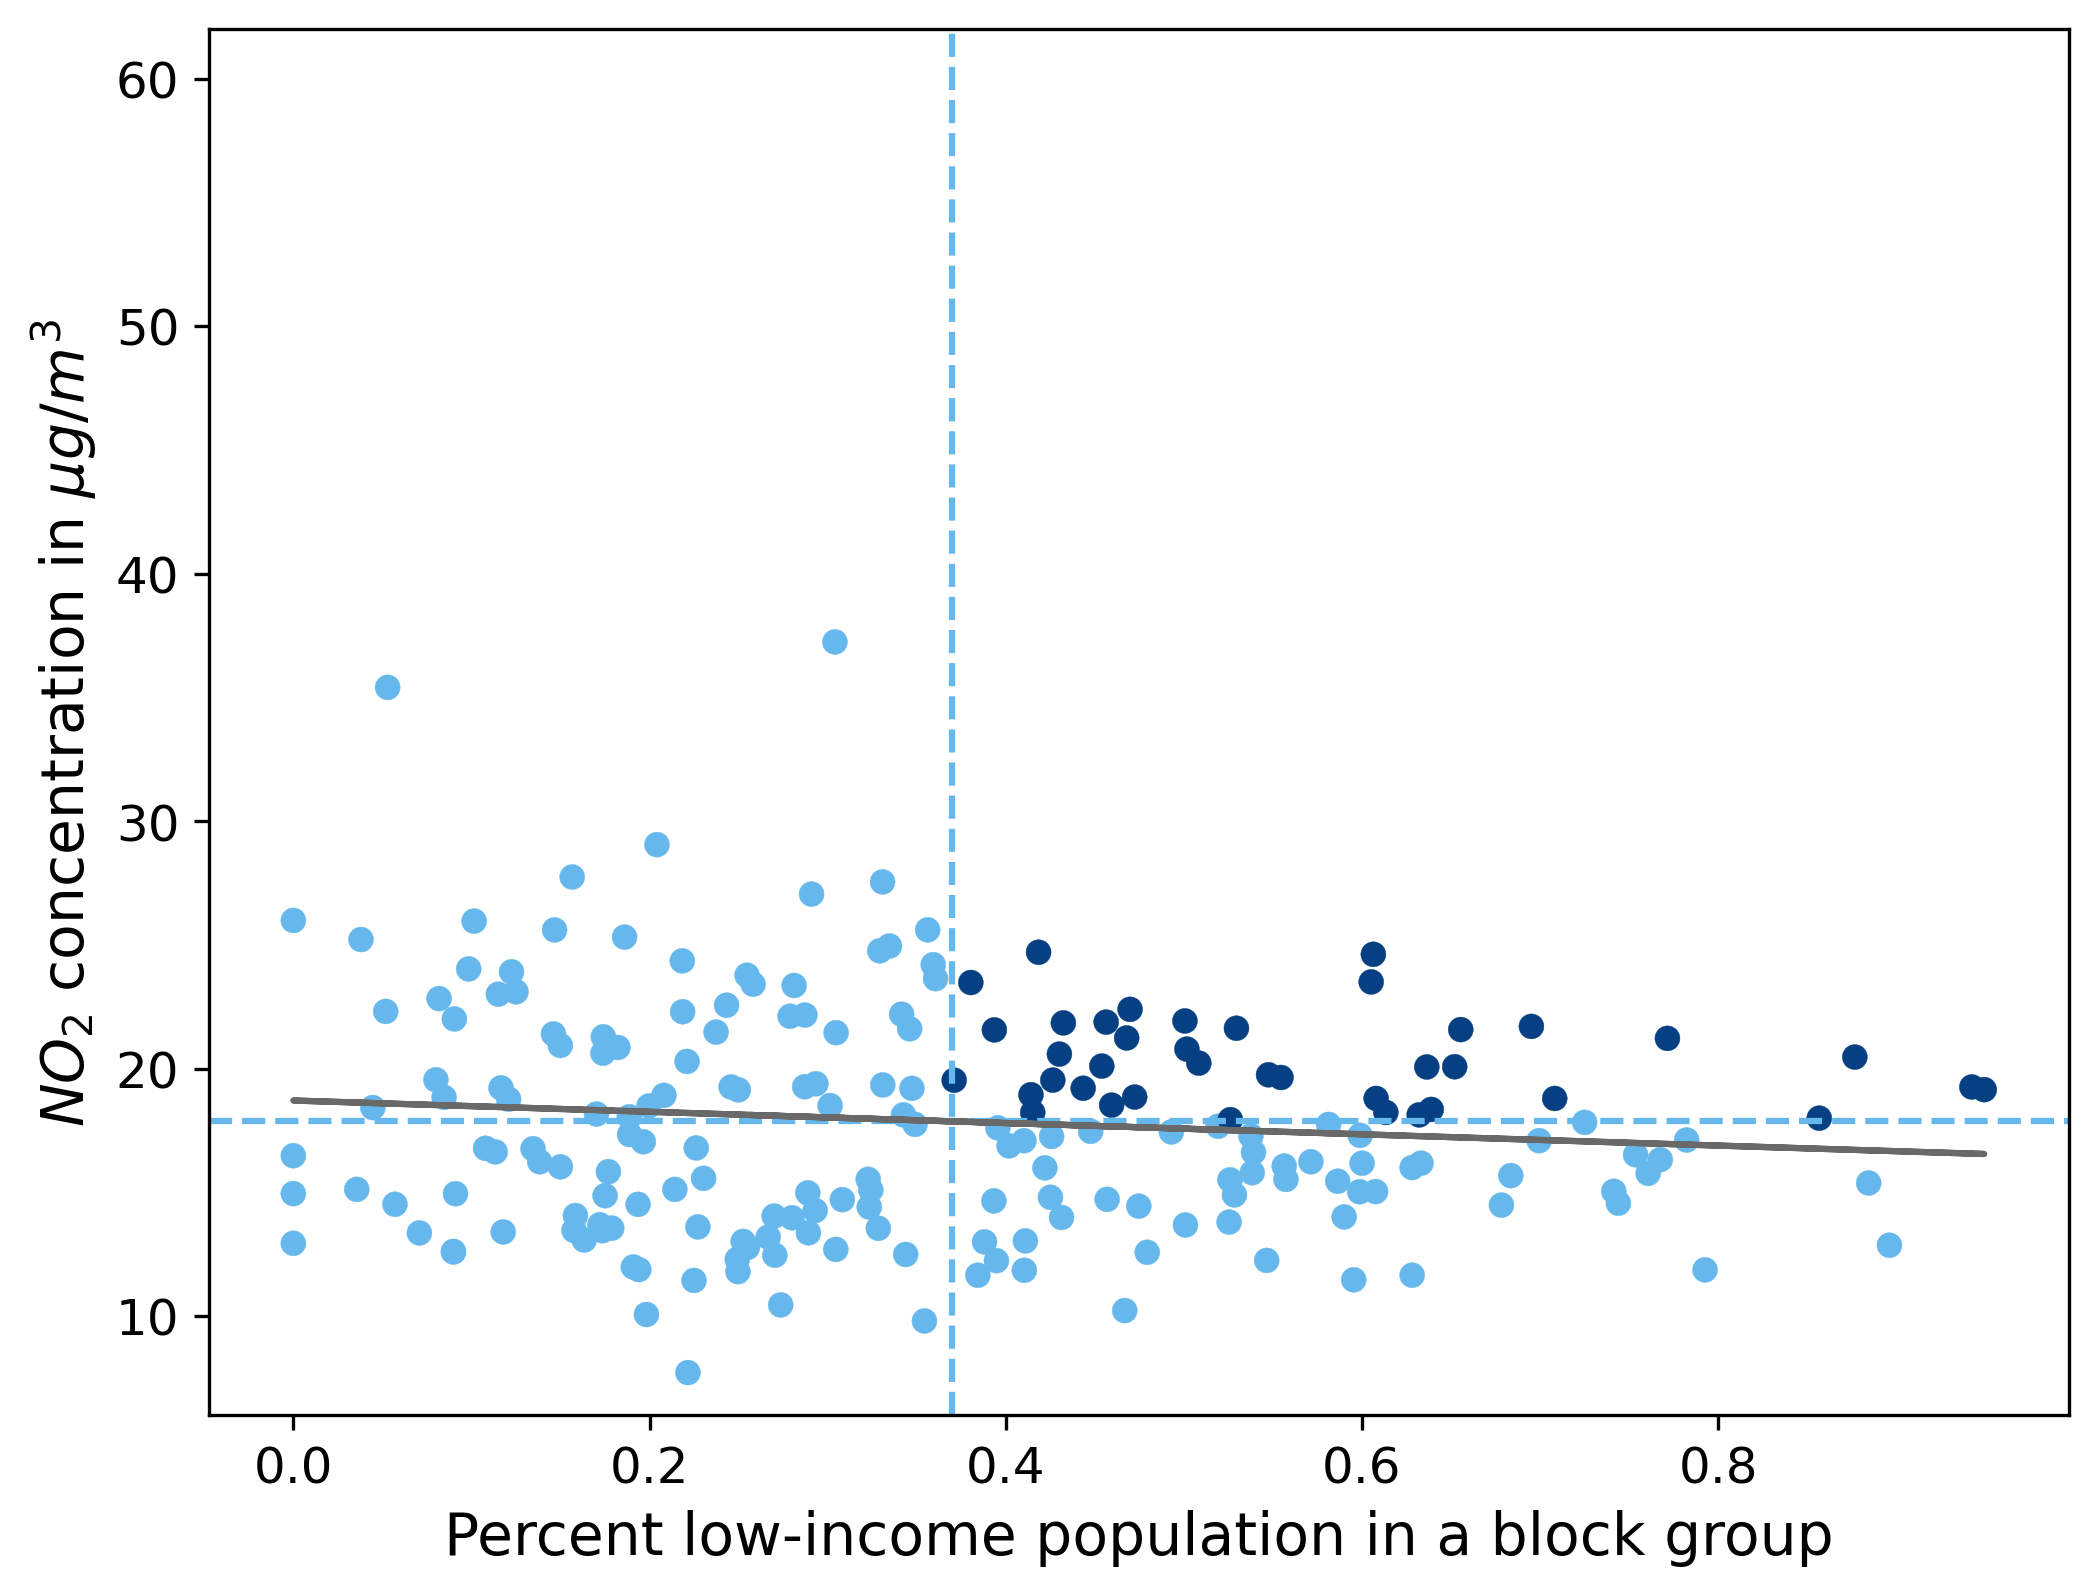

Pearson correlation coefficient: -0.108
Trend line equation: y = -2.28x + 18.71
R-squared: 0.011707978552076947
P-value for low-income_Percent: 0.11977978364195423
                            OLS Regression Results                            
Dep. Variable:             NO2_AVECON   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.440
Date:                Wed, 19 Feb 2025   Prob (F-statistic):              0.120
Time:                        22:03:08   Log-Likelihood:                -607.57
No. Observations:                 208   AIC:                             1219.
Df Residuals:                     206   BIC:                             1226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

In [21]:
# Define threshold values for high people of color percentage and high NO2 concentration
high_low_threshold = 0.37 # adjust as needed
high_no2_threshold = 17.88

# Create a new column for color based on conditions
colors = ['#074082' if (x > high_low_threshold and y > high_no2_threshold) else '#66b8ec'    #074082 #66b8ec  plt.ylim(6, 62)
          for x, y in zip(data2['LOWINCPCT'], data2['NO2_AVECON'])]

# Plot the scatter plot with customized colors
plt.figure(figsize=(8,6),dpi=300)
plt.scatter(data2['LOWINCPCT'], data2['NO2_AVECON'], color=colors, linewidths=0.1)

# Add the horizontal line at y = 17.91
plt.axhline(y=high_no2_threshold, color='#66b8ec', linestyle='--')
plt.axvline(x=high_low_threshold, color='#66b8ec', linestyle='--')


# Perform linear regression (least squares)
x2b = data2['LOWINCPCT']
y2 = data2['NO2_AVECON']

# Add a constant term for the intercept in the regression model
x2b_with_const = sm.add_constant(x2b)

# Fit the OLS (Ordinary Least Squares) model
model2b = sm.OLS(y2, x2b_with_const).fit()

# Extract the slope (coefficient) and intercept
intercept2b, slope2b = model2b.params

# Generate the trend line values
y_trend2b = slope2b * x2b + intercept2b

# Plot the trend line
plt.plot(x2b, y_trend2b, color='dimgrey', linestyle='-', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')


# Add labels and customize the plot
plt.xlabel('Percent low-income population in a block group', fontsize=14)
plt.ylabel(r'$NO_2$ concentration in $\mu g/m^3$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(6, 62)

plt.savefig('lowin_B.jpg')

# Show the plot
plt.show()

# Calculate and print Pearson correlation coefficient
pearson_corr2b, p_value2b = pearsonr(x2b, y2)
print(f"Pearson correlation coefficient: {pearson_corr2b:.3f}")

# Print the regression output
print(f'Trend line equation: y = {slope2b:.2f}x + {intercept2b:.2f}')
print("R-squared:", model2b.rsquared)
print("P-value for low-income_Percent:", model2b.pvalues['LOWINCPCT'])
print(model2b.summary())  # Detailed regression output

### [3] Site C

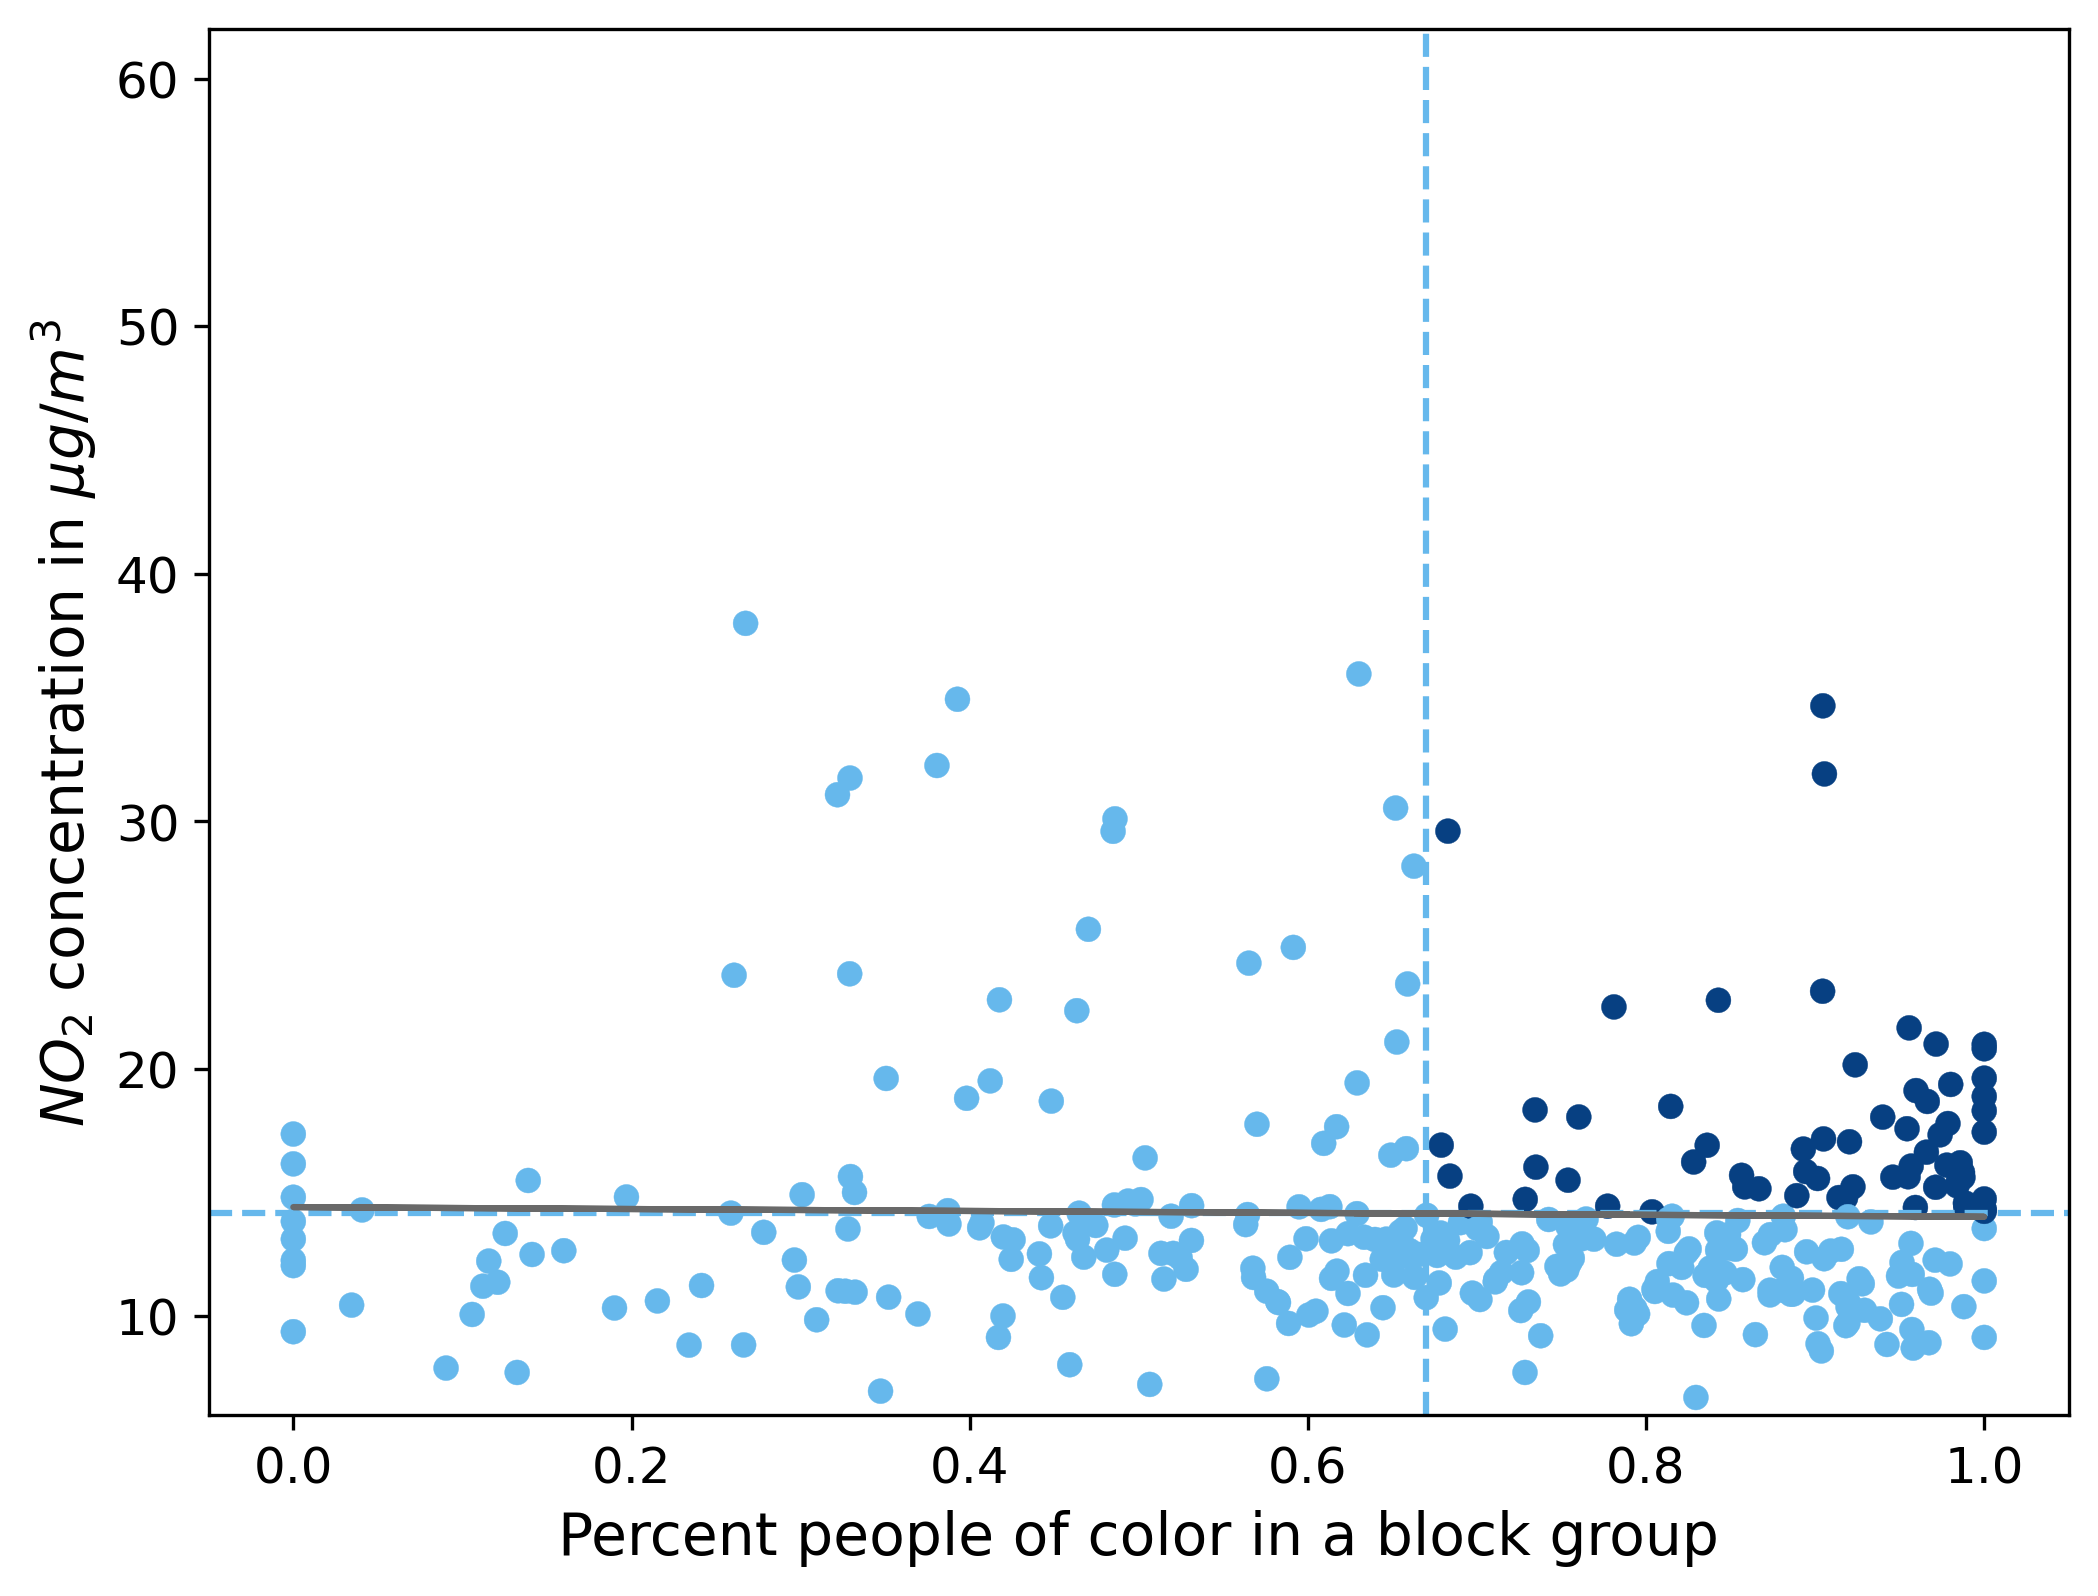

Pearson correlation coefficient: -0.020
Trend line equation: y = -0.39x + 14.41
R-squared: 0.0004130214919070285
P-value for POC_Percent: 0.7096792916197936
                            OLS Regression Results                            
Dep. Variable:             NO2_AVECON   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1388
Date:                Wed, 19 Feb 2025   Prob (F-statistic):              0.710
Time:                        22:04:46   Log-Likelihood:                -1015.5
No. Observations:                 338   AIC:                             2035.
Df Residuals:                     336   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t

In [23]:
# Define threshold values for high people of color percentage and high NO2 concentration
high_poc_threshold3 = 0.67  # adjust as needed
high_no2_threshold3 = 14.15  # adjust as needed

# Create a new column for color based on conditions
colors = ['#074082' if (x > high_poc_threshold3 and y > high_no2_threshold3) else '#66b8ec'  #074082  #66b8ec  plt.ylim(6, 62)
          for x, y in zip(data3['PEOPCOLORP'], data3['NO2_AVECON'])]

# Plot the scatter plot with customized colors
plt.figure(figsize=(8,6),dpi=300)
plt.scatter(data3['PEOPCOLORP'], data3['NO2_AVECON'], color=colors, linewidths=0.1)

# Add the horizontal line at y = 17.91
plt.axhline(y=high_no2_threshold3, color='#66b8ec', linestyle='--')
plt.axvline(x=high_poc_threshold3, color='#66b8ec', linestyle='--')


# Perform linear regression (least squares)
x3a = data3['PEOPCOLORP']
y3 = data3['NO2_AVECON']

# Add a constant term for the intercept in the regression model
x3a_with_const = sm.add_constant(x3a)

# Fit the OLS (Ordinary Least Squares) model
model3a = sm.OLS(y3, x3a_with_const).fit()

# Extract the slope (coefficient) and intercept
intercept3a, slope3a = model3a.params

# Generate the trend line values
y3a_trend = slope3a * x3a + intercept3a

# Plot the trend line
plt.plot(x3a, y3a_trend, color='dimgrey', linestyle='-', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')

# Add labels and customize the plot
plt.xlabel('Percent people of color in a block group', fontsize=14)
plt.ylabel(r'$NO_2$ concentration in $\mu g/m^3$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(6, 62)

## Save as PNG with high resolution
plt.savefig('poc_C.jpg') 

# Show the plot
plt.show()

# Calculate and print Pearson correlation coefficient
pearson_corr3a, p_value3a = pearsonr(x3a, y3)
print(f"Pearson correlation coefficient: {pearson_corr3a:.3f}")

# Print the regression output
print(f'Trend line equation: y = {slope3a:.2f}x + {intercept3a:.2f}')
print("R-squared:", model3a.rsquared)
print("P-value for POC_Percent:", model3a.pvalues['PEOPCOLORP'])
print(model3a.summary())  # Detailed regression output

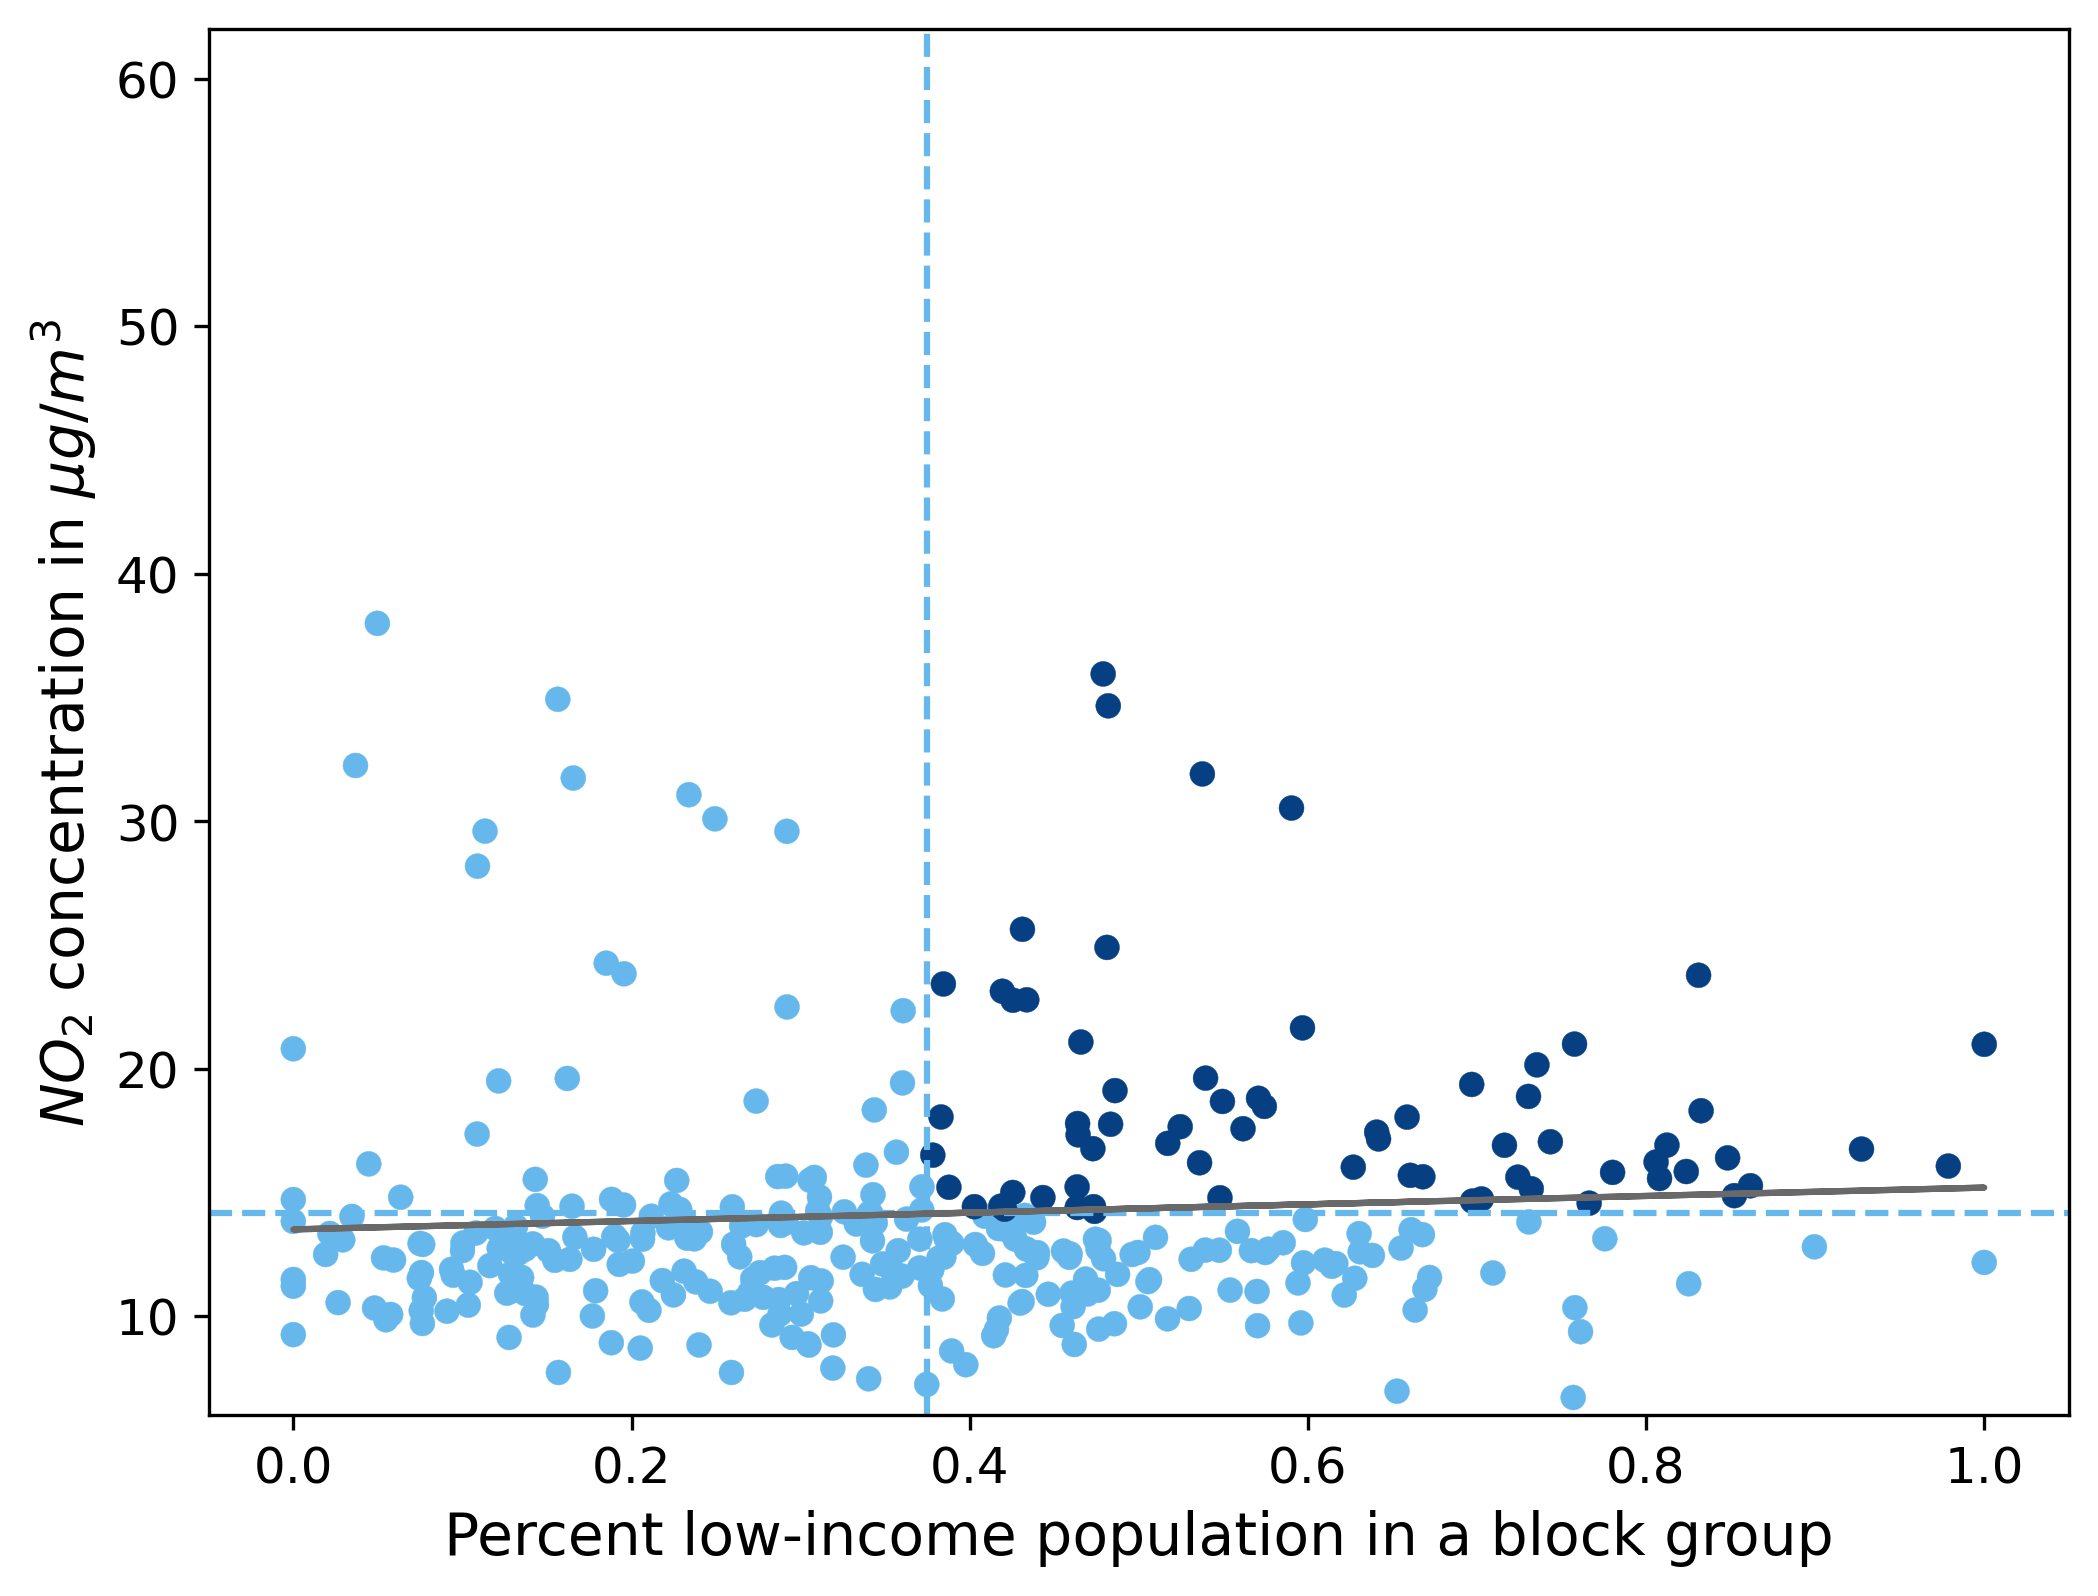

Pearson correlation coefficient: 0.075
Trend line equation: y = 1.69x + 13.51
R-squared: 0.0056659673393948395
P-value for low-income_Percent: 0.16737024631049405
                            OLS Regression Results                            
Dep. Variable:             NO2_AVECON   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.915
Date:                Wed, 19 Feb 2025   Prob (F-statistic):              0.167
Time:                        22:06:33   Log-Likelihood:                -1014.6
No. Observations:                 338   AIC:                             2033.
Df Residuals:                     336   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t    

In [24]:
# Define threshold values for high people of color percentage and high NO2 concentration
high_low_threshold3 = 0.375 # adjust as needed
high_no2_threshold3 = 14.15  # adjust as needed

# Create a new column for color based on conditions
colors = ['#074082' if (x > high_low_threshold3 and y > high_no2_threshold3) else '#66b8ec'  #074082  #66b8ec  plt.ylim(6, 62)
          for x, y in zip(data3['LOWINCPCT'], data3['NO2_AVECON'])]

# Plot the scatter plot with customized colors
plt.figure(figsize=(8,6),dpi=300)
plt.scatter(data3['LOWINCPCT'], data3['NO2_AVECON'], color=colors, linewidths=0.1)

# Add the horizontal line at y = 17.91
plt.axhline(y=high_no2_threshold3, color='#66b8ec', linestyle='--')
plt.axvline(x=high_low_threshold3, color='#66b8ec', linestyle='--')

# Perform linear regression (least squares)
x3b = data3['LOWINCPCT']
y3 = data3['NO2_AVECON']

# Add a constant term for the intercept in the regression model
x3b_with_const = sm.add_constant(x3b)

# Fit the OLS (Ordinary Least Squares) model
model3b = sm.OLS(y3, x3b_with_const).fit()

# Extract the slope (coefficient) and intercept
intercept3b, slope3b = model3b.params

# Generate the trend line values
y_trend3b = slope3b * x3b + intercept3b

# Plot the trend line
plt.plot(x3b, y_trend3b, color='dimgrey', linestyle='-', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')


# Add labels and customize the plot
plt.xlabel('Percent low-income population in a block group', fontsize=14)
plt.ylabel(r'$NO_2$ concentration in $\mu g/m^3$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(6, 62)

plt.savefig('lowin_C.jpg')

# Show the plot
plt.show()

# Calculate and print Pearson correlation coefficient
pearson_corr3b, p_value3b = pearsonr(x3b, y3)
print(f"Pearson correlation coefficient: {pearson_corr3b:.3f}")

# Print the regression output
print(f'Trend line equation: y = {slope3b:.2f}x + {intercept3b:.2f}')
print("R-squared:", model3b.rsquared)
print("P-value for low-income_Percent:", model3b.pvalues['LOWINCPCT'])
print(model3b.summary())  # Detailed regression output


### [4] Site D

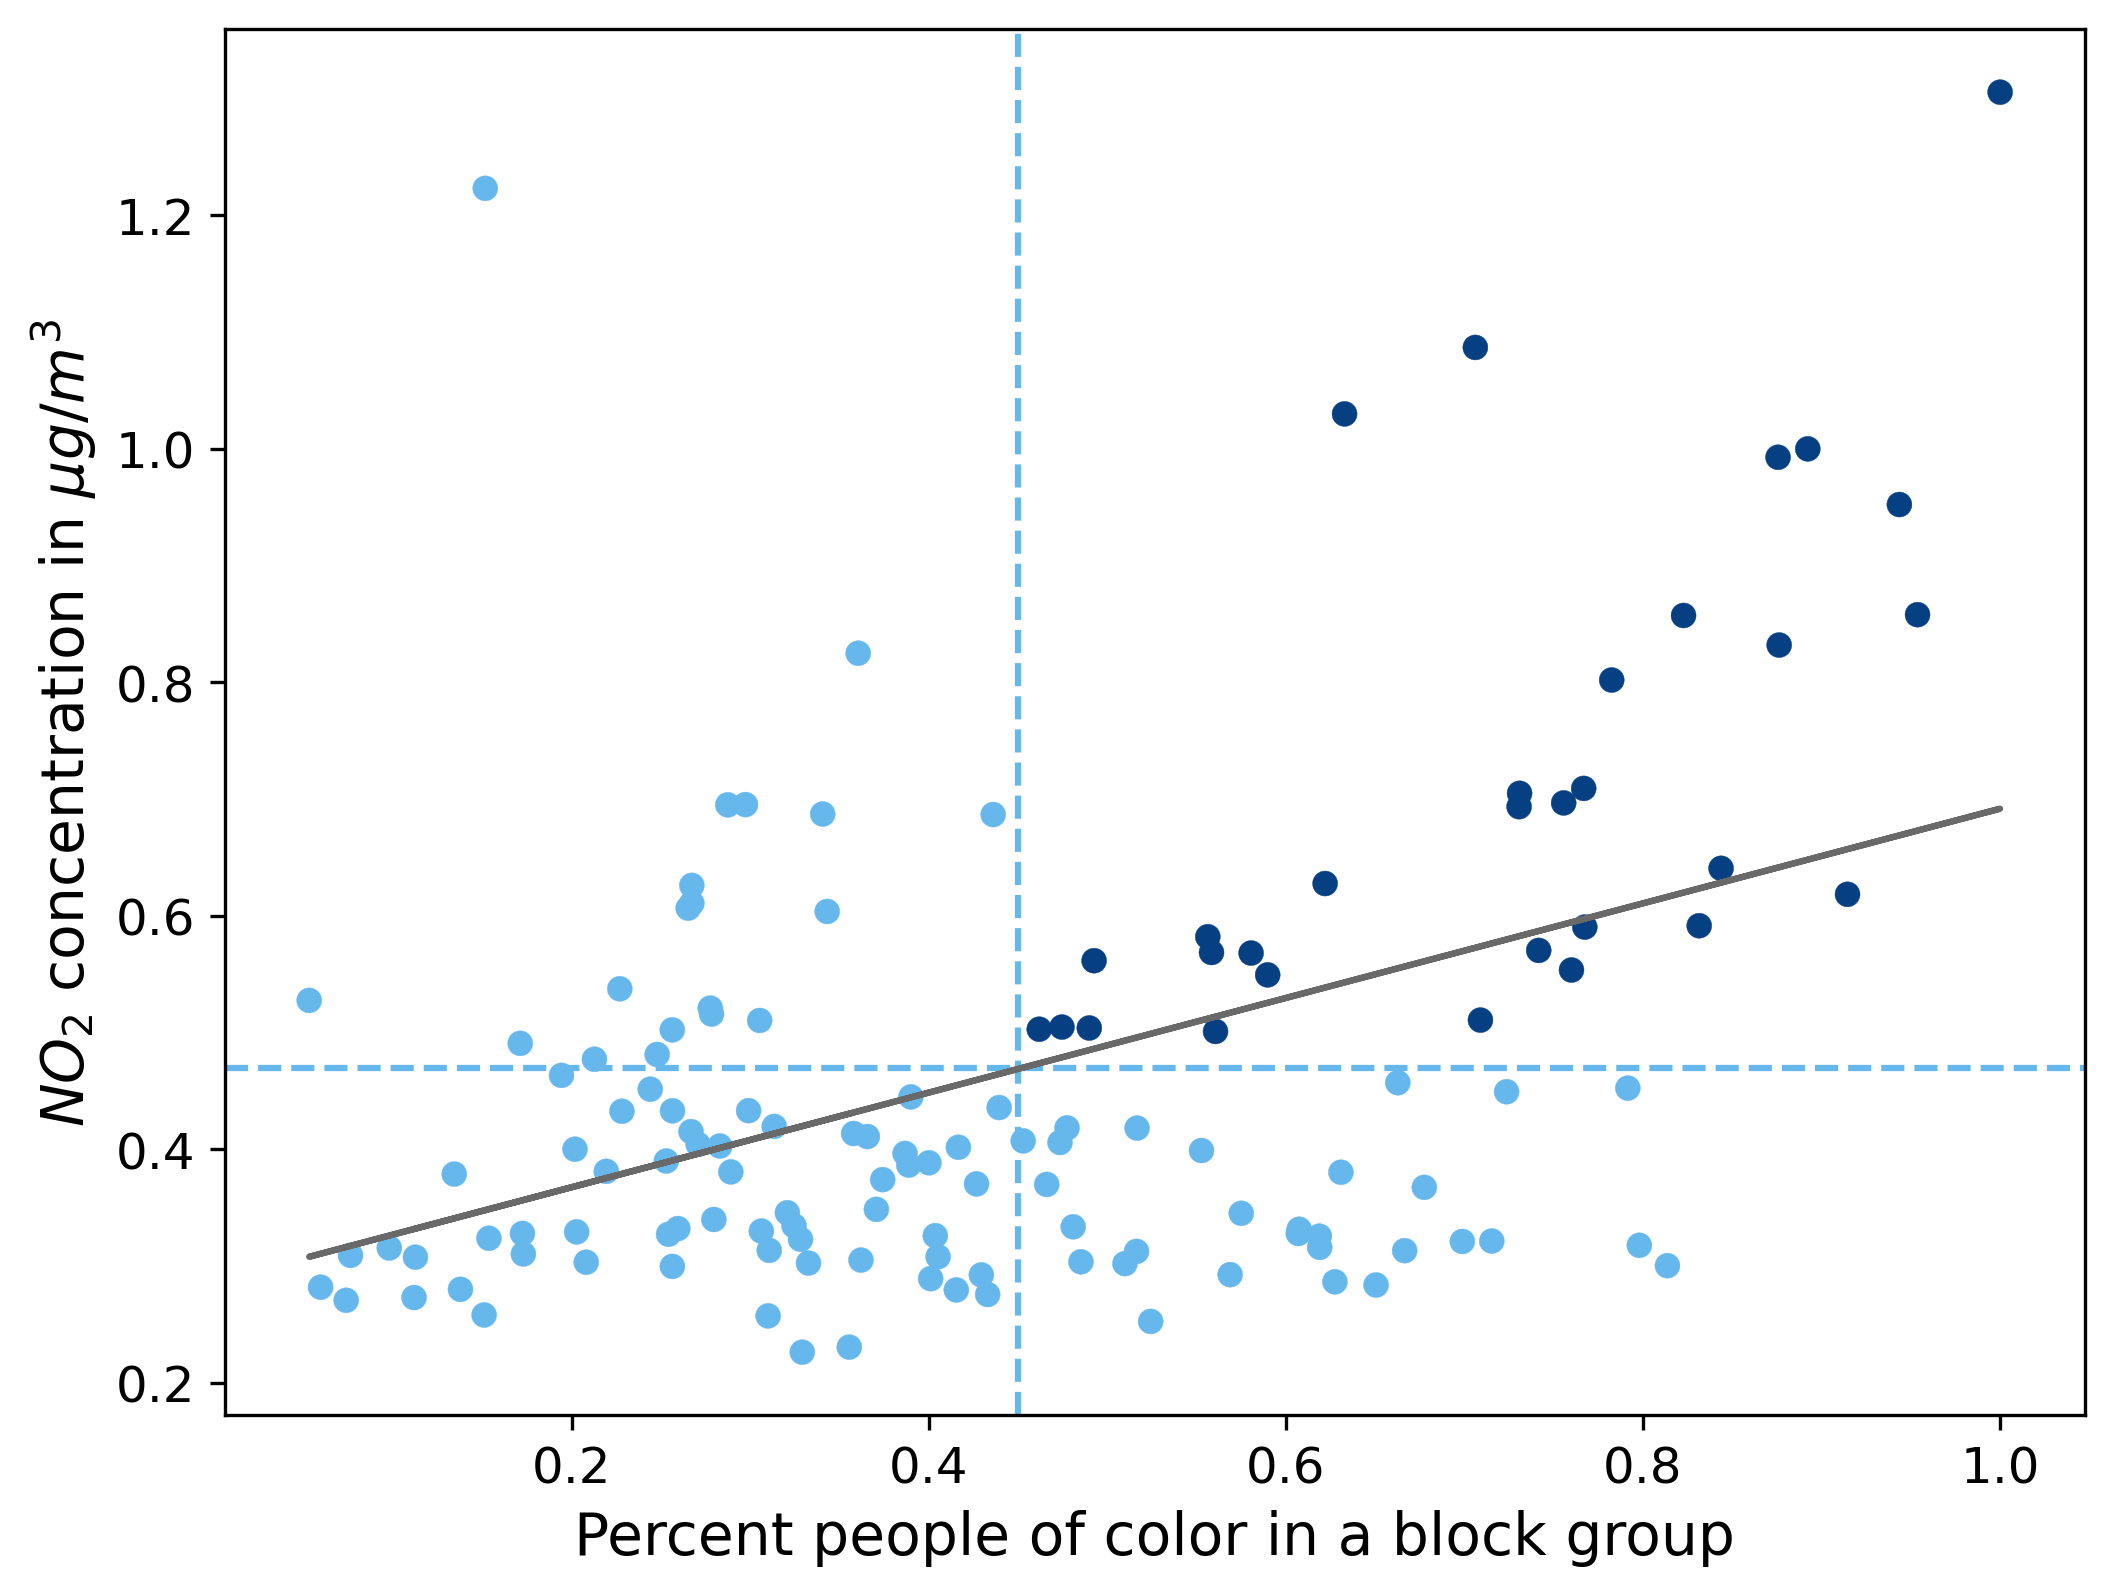

Pearson correlation coefficient: 0.452
Trend line equation: y = 0.41x + 0.29
R-squared: 0.20400912900087975
P-value for POC_Percent: 3.025781216683078e-08
                            OLS Regression Results                            
Dep. Variable:            NO2_AVECONC   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     34.60
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           3.03e-08
Time:                        22:08:59   Log-Likelihood:                 39.027
No. Observations:                 137   AIC:                            -74.05
Df Residuals:                     135   BIC:                            -68.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| 

In [25]:
# Define threshold values for high people of color percentage and high NO2 concentration
high_poc_threshold4 = 0.45  # adjust as needed
high_no2_threshold4 = 0.47  # adjust as needed

# Create a new column for color based on conditions
colors = ['#074082' if (x > high_poc_threshold4 and y > high_no2_threshold4) else '#66b8ec'   #074082 #66b8ec  plt.ylim(6, 62)
          for x, y in zip(data4['PEOPCOLORP'], data4['NO2_AVECONC'])]      ## navy  cornflowerblue

# Plot the scatter plot with customized colors
plt.figure(figsize=(8,6),dpi=300)
plt.scatter(data4['PEOPCOLORP'], data4['NO2_AVECONC'], color=colors, linewidths=0.1)

# Add the horizontal line at y = 17.91
plt.axhline(y=high_no2_threshold4, color='#66b8ec', linestyle='--')
plt.axvline(x=high_poc_threshold4, color='#66b8ec', linestyle='--')

# Perform linear regression (least squares)
x4a = data4['PEOPCOLORP']
y4 = data4['NO2_AVECONC']

# Add a constant term for the intercept in the regression model
x4a_with_const = sm.add_constant(x4a)

# Fit the OLS (Ordinary Least Squares) model
model4a = sm.OLS(y4, x4a_with_const).fit()

# Extract the slope (coefficient) and intercept
intercept4a, slope4a = model4a.params

# Generate the trend line values
y4a_trend = slope4a * x4a + intercept4a

# Plot the trend line
plt.plot(x4a, y4a_trend, color='dimgrey', linestyle='-', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')

# Add labels and customize the plot
plt.xlabel('Percent people of color in a block group', fontsize=14)
plt.ylabel(r'$NO_2$ concentration in $\mu g/m^3$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

## Save as PNG with high resolution
plt.savefig('poc_D.jpg') 

# Show the plot
plt.show()

# Calculate and print Pearson correlation coefficient
pearson_corr4a, p_value4a = pearsonr(x4a, y4)
print(f"Pearson correlation coefficient: {pearson_corr4a:.3f}")

# Print the regression output
print(f'Trend line equation: y = {slope4a:.2f}x + {intercept4a:.2f}')
print("R-squared:", model4a.rsquared)
print("P-value for POC_Percent:", model4a.pvalues['PEOPCOLORP'])
print(model4a.summary())  # Detailed regression output


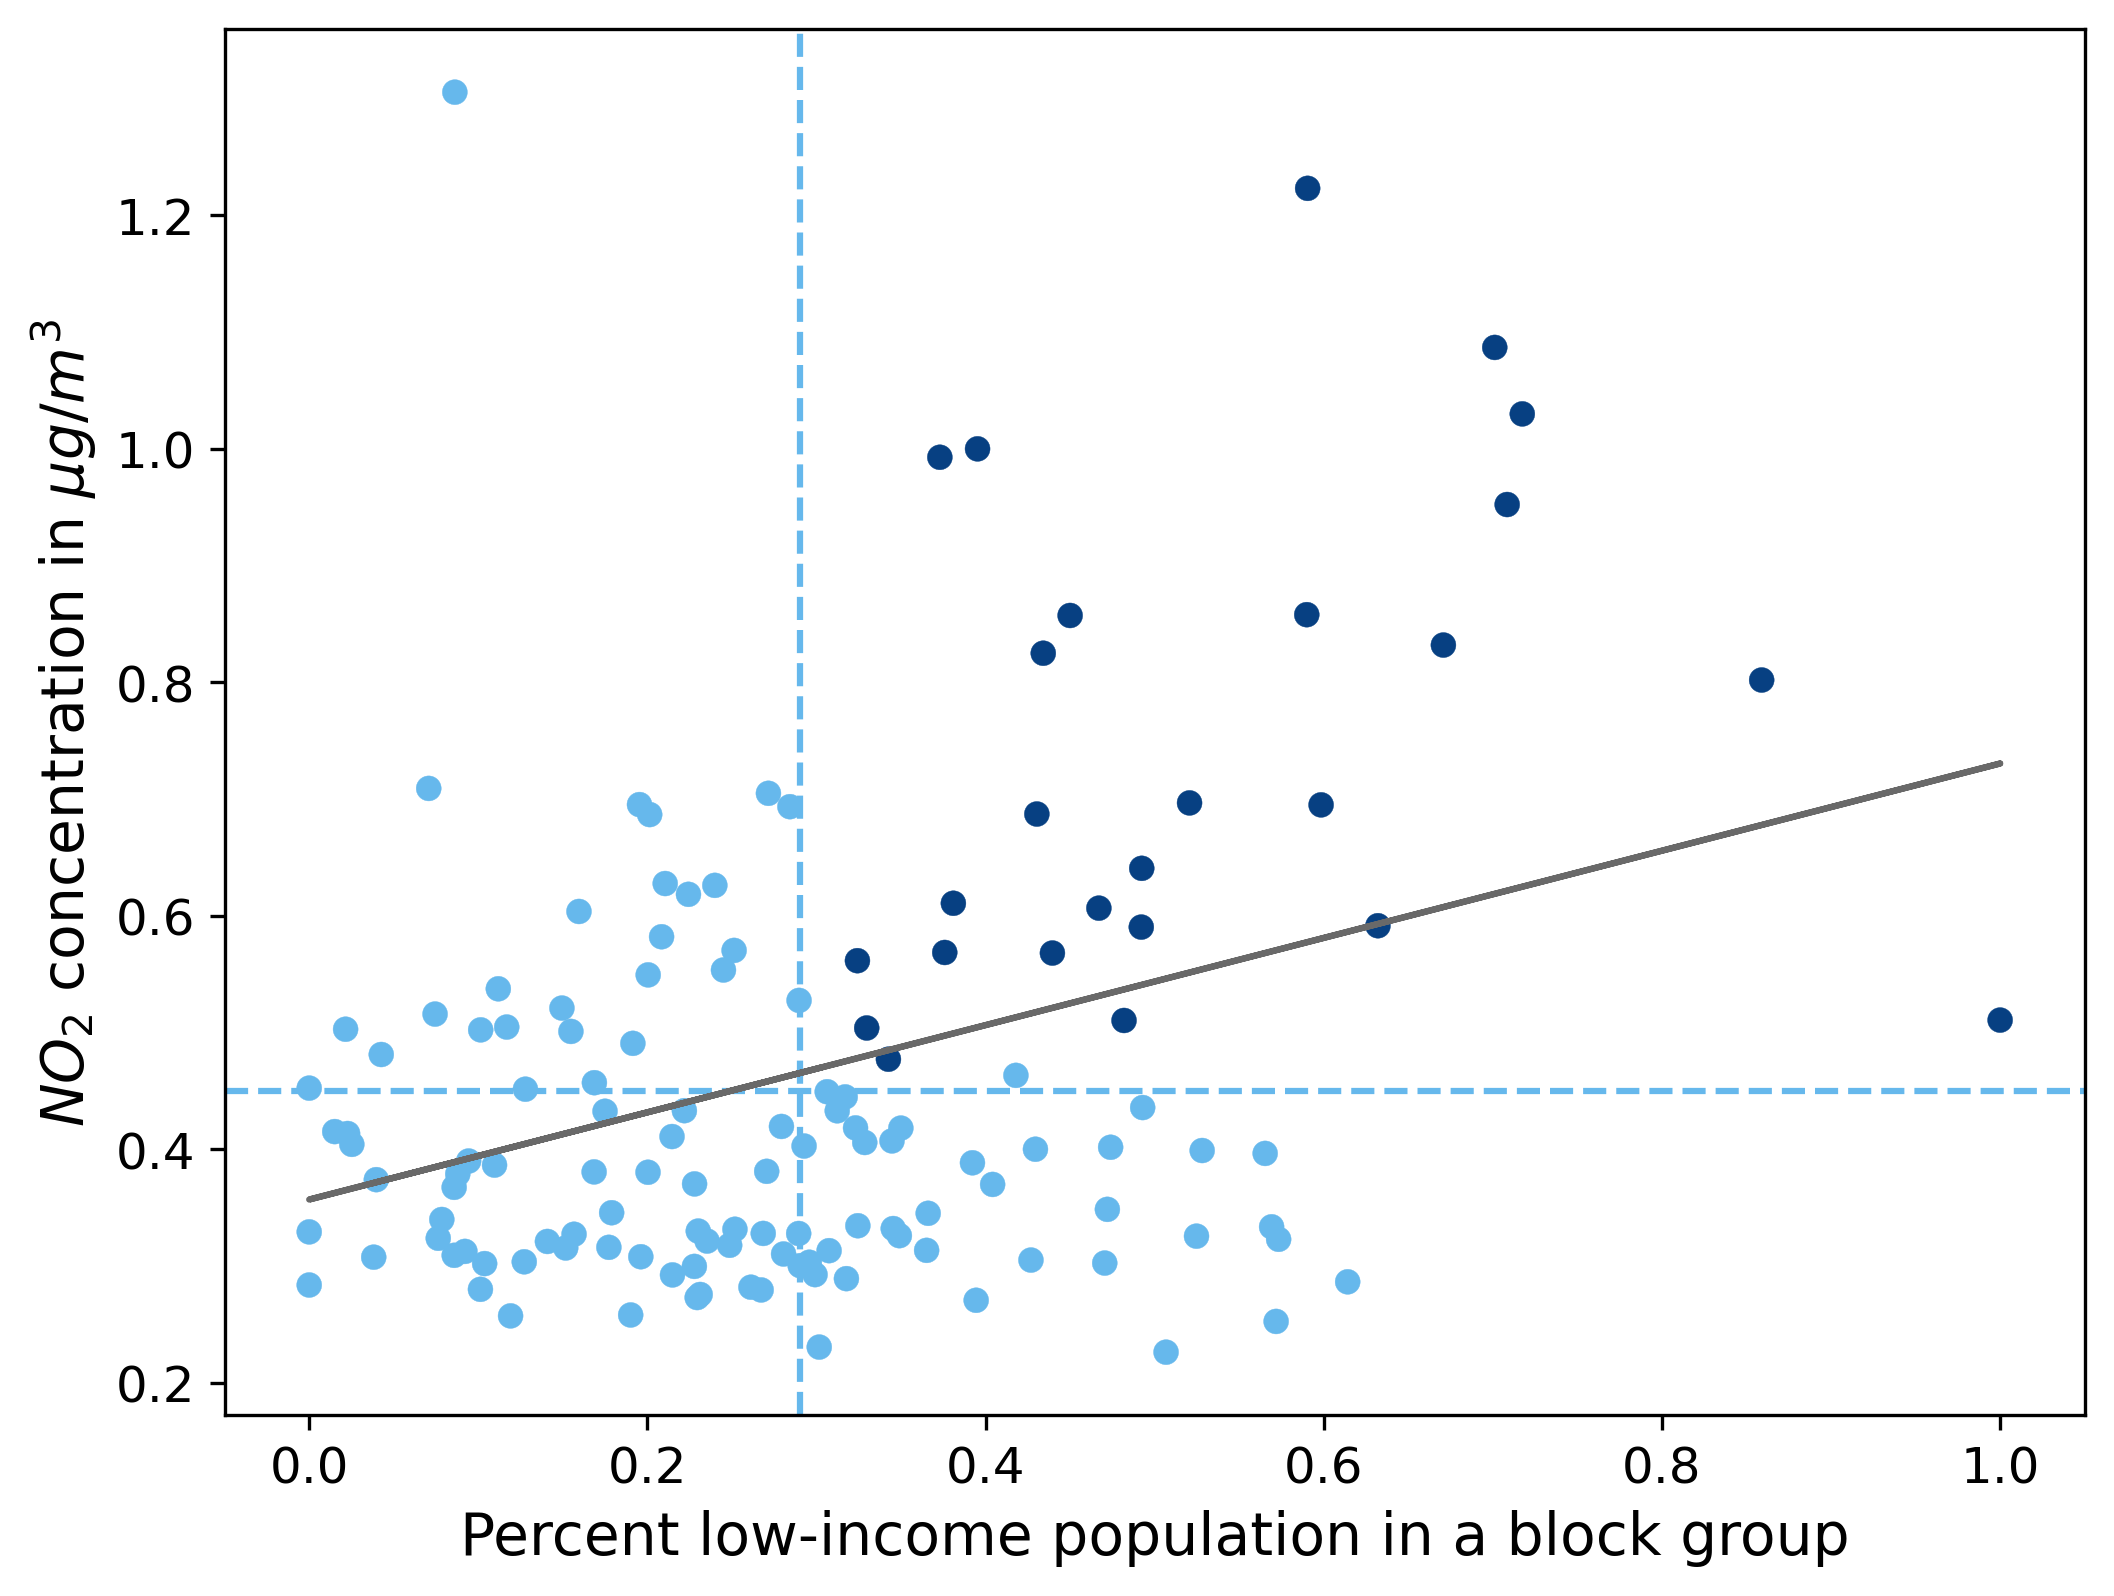

Pearson correlation coefficient: 0.343
Trend line equation: y = 0.37x + 0.36
R-squared: 0.11753491201767519
P-value for low-income_Percent: 4.113869024625283e-05
                            OLS Regression Results                            
Dep. Variable:            NO2_AVECONC   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     17.98
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           4.11e-05
Time:                        22:10:44   Log-Likelihood:                 31.963
No. Observations:                 137   AIC:                            -59.93
Df Residuals:                     135   BIC:                            -54.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     

In [26]:
#Define threshold values for high people of color percentage and high NO2 concentration
high_low_threshold4 = 0.297 # adjust as needed
high_no2_threshold4 = 0.47  # adjust as needed

# Create a new column for color based on conditions
colors = ['#074082' if (x > high_low_threshold4 and y > high_no2_threshold4) else '#66b8ec'   #074082  #66b8ec  plt.ylim(6, 62)
          for x, y in zip(data4['LOWINCPCT'], data4['NO2_AVECONC'])]           ## teal  mediumaquamarine

# Plot the scatter plot with customized colors
plt.figure(figsize=(8,6),dpi=300)
plt.scatter(data4['LOWINCPCT'], data4['NO2_AVECONC'], color=colors, linewidths=0.1)

# Add the horizontal line at y = 17.91
plt.axhline(y=0.45, color='#66b8ec', linestyle='--')
plt.axvline(x=0.29, color='#66b8ec', linestyle='--')


# Perform linear regression (least squares)
x4b = data4['LOWINCPCT']
y4 = data4['NO2_AVECONC']

# Add a constant term for the intercept in the regression model
x4b_with_const = sm.add_constant(x4b)

# Fit the OLS (Ordinary Least Squares) model
model4b = sm.OLS(y4, x4b_with_const).fit()

# Extract the slope (coefficient) and intercept
intercept4b, slope4b = model4b.params

# Generate the trend line values
y_trend4b = slope4b * x4b + intercept4b

# Plot the trend line
plt.plot(x4b, y_trend4b, color='dimgrey', linestyle='-', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')


# Add labels and customize the plot
plt.xlabel('Percent low-income population in a block group', fontsize=14)
plt.ylabel(r'$NO_2$ concentration in $\mu g/m^3$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('lowin_D.jpg')

# Show the plot
plt.show()

# Calculate and print Pearson correlation coefficient
pearson_corr4b, p_value4b = pearsonr(x4b, y4)
print(f"Pearson correlation coefficient: {pearson_corr4b:.3f}")

# Print the regression output
print(f'Trend line equation: y = {slope4b:.2f}x + {intercept4b:.2f}')
print("R-squared:", model4b.rsquared)
print("P-value for low-income_Percent:", model4b.pvalues['LOWINCPCT'])
print(model4b.summary())  # Detailed regression output
